## Problem Definition

In platforms like last.fm, users generally add tags to make the song get seen by those who wish listening them. Some users find what they will listen with these tags which includes information about the genres. Although, there are many missing tags which lead users spend more time finding what to listen. For this problem, we want you to implement machine learning algorithms to improve data quality of the last.fm, and the user experience. 

<b>Your task is here, classifiying  whether given song's genre is progressive rock or pop by its lyrics.</b><p>That project is different than other classification-based projects. So, after you complete that assignment; you will be able to comprehend many basic concepts of Natural Language Processing.</p>

#### **The homework is due Sunday, October 17 midnight.** 

## Import Libraries

Main Libraries for you to deploy your model (Feel free to use other libraries that you think helpful):  
<li><a href = 'https://pandas.pydata.org/'>
Pandas
</a></li> 
<li><a href = 'https://numpy.org/'>
Numpy
</a></li> 
<li><a href = 'https://scikit-learn.org/'>
Sklearn 
</a></li> 
<li><a href = 'https://docs.python.org/3/library/re.html'>
re
</a></li> 
<li><a href = 'https://www.nltk.org/'>
nltk
</a></li> 
<li><a href = 'https://amueller.github.io/word_cloud/'>
WordCloud 
</a></li>



In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import wordcloud
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

import tokenize
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

### Import Data

Use <a href = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html'>
pandas.read_excel()
</a>
function for importing your excel file.

In [2]:
data = pd.read_excel("selected_songs.xlsx")

## PART I : Data Preprocessing

<a href="https://www.edupristine.com/blog/text-mining-overview">Here </a> is a brief blogpost about text mining steps and terminology used below.If you want more detail about text mining and nltk library in Python, this <a href="https://www.youtube.com/watch?v=05ONoGfmKvA">video</a> could help. 


### 1-) Removing Numbers, Punctuations and Lower the Words

In [3]:
data["lyrics"]

0      I am just a new boy,\nStranger in this town.,\...
1      Eins, zwei, drei, alle!,Ooooh You cannot reach...
2      All alone, or in twos,\nThe ones who really lo...
3      Into the distance a ribbon of black,\nStretche...
4      You got to be crazy, gotta have a real need,\n...
                             ...                        
825    I Don't Know,\nThat You Want To Try,\nEvertime...
826    Girl, close your eyes,\nLet that rhythm get in...
827    Help,\nI have done it again,\nI have been here...
828    Yeah, Rihanna,Good Girl Gone Bad,\nTake three,...
829    Work, work, work, work, work, work,He said me ...
Name: lyrics, Length: 830, dtype: object

In [4]:
# Please run the code
def rid_of_specials(words):
    new= ''
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
        new += a
    return new

#### a.Apply <b>rid_of_specials</b> to lyrics column in your dataset.


In [5]:
data['lyrics'] = [rid_of_specials(i) for i in data['lyrics']]

#### b.Explain what above code cell does step by step and why you run it. 

The lyrics of the data contain some numbers, punctuations, and capitalized words that make it difficult to work with the data. These need to be gotten rid of. We wrote a function to get rid of them. The function takes the lyrics as input and uses the "sub" function of the "Regular Expression" library to bring the words or expressions we want to the unwanted places in the lyrics. Since we wanted to get rid of punctuation marks, we entered the "[^A-Za-z]" command inside the function, which removes punctuations. And we filled them with space. At the end, we used the ".lower()" function because we wanted to make the sentence lowercase.

In [6]:
data["lyrics"]

0      i am just a new boy  stranger in this town   w...
1      eins  zwei  drei  alle  ooooh you cannot reach...
2      all alone  or in twos  the ones who really lov...
3      into the distance a ribbon of black  stretched...
4      you got to be crazy  gotta have a real need  g...
                             ...                        
825    i don t know  that you want to try  evertime y...
826    girl  close your eyes  let that rhythm get int...
827    help  i have done it again  i have been here m...
828    yeah  rihanna good girl gone bad  take three  ...
829    work  work  work  work  work  work he said me ...
Name: lyrics, Length: 830, dtype: object

### 2-) Tokenize

In [7]:
tokenized=[word_tokenize(i) for i in data['lyrics']]

In [8]:
tokenized

[['i',
  'am',
  'just',
  'a',
  'new',
  'boy',
  'stranger',
  'in',
  'this',
  'town',
  'where',
  'are',
  'all',
  'the',
  'good',
  'times',
  'who',
  's',
  'gon',
  'na',
  'show',
  'this',
  'stranger',
  'around',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'woman',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'girl',
  'will',
  'some',
  'woman',
  'in',
  'this',
  'desert',
  'land',
  'make',
  'me',
  'feel',
  'like',
  'a',
  'real',
  'man',
  'take',
  'this',
  'rock',
  'and',
  'roll',
  'refugee',
  'oooh',
  'babe',
  'set',
  'me',
  'free',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'woman',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'girl',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'woman',
  'ooooh',
  'i',
  'need',
  'a',
  'dirty',
  'girl'],
 ['eins',
  'zwei',
  'drei',
  'alle',
  'ooooh',
  'you',
  'can',
  'not',
  'reach',
  'me',
  'now',
  'ooooh',
  'no',
  'matter',
  'how',
  'you',
  'try',
  'goodbye',
  'cruel'

### 3-) Removing Stopwords

In [9]:
# Please run the code
#Step 1
stop_words = set(stopwords.words('english'))
#Step 2
stopped = [[i for i in j if i not in stop_words] for j in tokenized]

In [10]:
stopped

[['new',
  'boy',
  'stranger',
  'town',
  'good',
  'times',
  'gon',
  'na',
  'show',
  'stranger',
  'around',
  'ooooh',
  'need',
  'dirty',
  'woman',
  'ooooh',
  'need',
  'dirty',
  'girl',
  'woman',
  'desert',
  'land',
  'make',
  'feel',
  'like',
  'real',
  'man',
  'take',
  'rock',
  'roll',
  'refugee',
  'oooh',
  'babe',
  'set',
  'free',
  'ooooh',
  'need',
  'dirty',
  'woman',
  'ooooh',
  'need',
  'dirty',
  'girl',
  'ooooh',
  'need',
  'dirty',
  'woman',
  'ooooh',
  'need',
  'dirty',
  'girl'],
 ['eins',
  'zwei',
  'drei',
  'alle',
  'ooooh',
  'reach',
  'ooooh',
  'matter',
  'try',
  'goodbye',
  'cruel',
  'world',
  'walk',
  'sitting',
  'bunker',
  'behind',
  'wall',
  'waiting',
  'worms',
  'come',
  'worms',
  'come',
  'perfect',
  'isolation',
  'behind',
  'wall',
  'waiting',
  'worms',
  'come',
  'worms',
  'come',
  'audience',
  'convene',
  'one',
  'fifteen',
  'outside',
  'brixton',
  'town',
  'hall',
  'going',
  'waiting',

#### a.Explain what above code cell does step by step and why you run it. 

A stop word is a commonly used word that a search engine is programmed to ignore both when indexing search entries and when retrieving them as a result. Words like ["a", "an", "the", "this", "that", "is", "it", "to", "and"] are examples. We don't want these words to take up space in our database or take up valuable processing time. So we run a function to remove those words. English stop words in "Step 1" are given by the list. In "Step2", we have created a nested for loop to search for these words among the words we have separated above as "tokenized".

### 4-) Lemmatization

In [11]:
# Please run the code
# Step 1
lemmatizer = WordNetLemmatizer()
# Step 2
lemmatized = [[lemmatizer.lemmatize(i) for i in j] for j in stopped]
# Step 3
prepeared_sentence= [' '.join(j) for j in lemmatized]
data['Lyrics_Processed'] = prepeared_sentence

In [12]:
data['Lyrics_Processed']

0      new boy stranger town good time gon na show st...
1      eins zwei drei alle ooooh reach ooooh matter t...
2      alone two one really love walk outside wall ha...
3      distance ribbon black stretched point turning ...
4      got crazy got ta real need got sleep toe stree...
                             ...                        
825    know want try evertime see remember fell love ...
826    girl close eye let rhythm get try fight nothin...
827    help done many time hurt today worst part one ...
828    yeah rihanna good girl gone bad take three act...
829    work work work work work work said haffi work ...
Name: Lyrics_Processed, Length: 830, dtype: object

#### a.Explain what above code cell does step by step and why you run it. 

In "Step 1" we called the "WordNetLemmatizer" function to perform the lemmatization and assigned it to a variable. Then we lemmatized the "stopped" variable in "Step 2" by creating a nested for loop. And in "Step 3" we assign it to a list with the ".join" function.

#### b.Explain why lemmatization is used for.

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. Examples: rocks -> rock, better -> good, feet -> foot, (am, are, is) -> be.

#### c. Which method can be used instead of Lemmatization method and explain differences.

***Stemming*** and lemmatization are both methods used to analyze the meaning behind a word. Stemming uses the root of the word while lemmatization uses the context in which the word is used. This is the only difference between them.

### 5-) Vectorization

In [13]:
# Please run the code
#Step 1
vectorizer = CountVectorizer()
#Step 2
X = vectorizer.fit_transform(prepeared_sentence)
#Step 3
feature_names = vectorizer.get_feature_names()
#Step 4
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)

In [14]:
lyrics_vectorized

aa  aaa  aaaaaaaaah  aaaaaaaah  aaaah  aaah  aah  aahh  aaow  abandon  \
0     0    0           0          0      0     0    0     0     0        0   
1     0    0           0          0      0     0    0     0     0        0   
2     0    0           0          0      0     0    0     0     0        0   
3     0    0           0          0      0     0    0     0     0        0   
4     0    0           0          0      0     0    0     0     0        0   
..   ..  ...         ...        ...    ...   ...  ...   ...   ...      ...   
825   0    0           0          0      0     0    0     0     0        0   
826   0    0           0          0      0     0    0     0     0        0   
827   0    0           0          0      0     0    0     0     0        0   
828   0    0           0          0      0     0    0     0     0        0   
829   0    0           0          0      0     0    0     0     0        0   

     ...  zen  zeus  zig  zip  zombie  zone  zoning  zoo  zwei  zy  
0    ...    0     0    0    0       0     0       0    0     0   0  
1    ...    0     0    0    0       0     0       0    0     1   0  
2    ...    0     0    0    0       0     0       0    0     0   0  
3    ...    0     0    0    0       0     0       0    0     0   0  
4    ...    0     0    0    0       0     0       0    0     0   0  
..   ...  ...   ...  ...  ...     ...   ...     ...  ...   ...  ..  
825  ...    0     0    0    0       0     0       0    0     0   0  
826  ...    0     0    0    0       0     0       0    0     0   0  
827  ...    0     0    0    0       0     0       0    0     0   0  
828  ...    0     0    0    0       0     0       0    0     0   0  
829  ...    0     0    0    0       0     0       0    0     0   0  

[830 rows x 8071 columns]

#### a.Explain what above code cell does step by step and why you run it. 

We started writing the code by calling the "CountVectorizer" function on "Step 1" and assigned it to a variable. In "Step 2" we used the ".fit_transform" function to vectorize the "prepeared_sentence" variable that we created above. In "Step 3" We have pulled the names of the columns we vectorized to use to create the DataFrame , with the ".get_feature_names" function and assign them to a variable again. In the last step, we used the ".toarray" function to convert the variable we created in "Step 2" to a numpy array in order to convert it to DataFrame. And then, as I mentioned in "Step 3", a new dataframe is created by assigning the column names to the numpy array.

#### b.Explain why countvectorizer is used for.

CountVectorizer is a function for a classic approach to converting input data from its raw format to real number vectors.

#### c. Google "TF-IDF Vectorization". Briefly explain the differences from Count Vectorazation.

The difference of the TF-IDF Vectorization method from Count Vectorazation is that it not only focuses on the frequency of the presented words, but also ensures the importance of the words. In this way, we can remove words that are less important for analysis, thereby reducing input sizes, making model building less complex.

### 6-) Target Preperation

Run cells below,

In [10]:
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

In [9]:
y = data.genre.map({'prog':1,'pop':0})
y

0      1
1      1
2      1
3      1
4      1
      ..
825    0
826    0
827    0
828    0
829    0
Name: genre, Length: 830, dtype: int64

Variable y is a single line target preperation step seen above. By looking at that output y, rewrite that target creation step
by using <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>
OneHotEnconder()</a> 
 function.


In [297]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(data["genre"].to_frame()) #fit
enc.transform(data["genre"].to_frame()).toarray()
data[["pop","prog"]]=enc.transform(data["genre"].to_frame()).toarray()
data["prog"]=pd.to_numeric(data["prog"],downcast='integer')

In [298]:
data.prog

0      1
1      1
2      1
3      1
4      1
      ..
825    0
826    0
827    0
828    0
829    0
Name: prog, Length: 830, dtype: int8

## PART II : Exploratory Data Analysis 

Please, perform exploratory data analysis and share your findings. This <a href="https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools">link </a> can be useful.

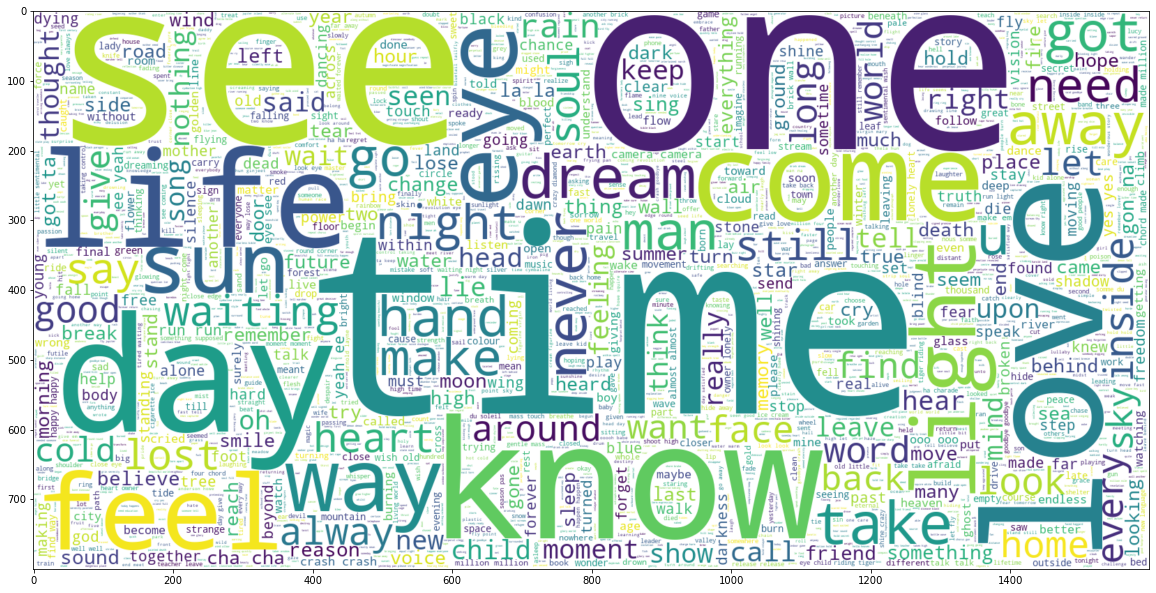

In [218]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,background_color ='white').generate(" ".join(data[data.prog == 1].Lyrics_Processed))
plt.imshow(wc , interpolation = 'bilinear')

   **-We plotted a figure to show the frequency of the words that found in lyrics. To get the frequency of the words we used "WordCloud" function.**

## PART III : Feature Creation & Selection

### 1-) Try creating additional features for your models and justify them by explaining. (Optional)

In [299]:
value=data["Artist"].value_counts()
df_value= pd.DataFrame(value)

In [300]:
count = data["Artist"].count()

In [301]:
artist_name=list(data["Artist"])
liste2=[]
for i in artist_name:
    liste2.append((df_value/count)["Artist"][i])

In [302]:
data["Probability_Artist"]=liste2

In [303]:
data.head()

genre                                             lyrics      Artist  \
0  prog  i am just a new boy  stranger in this town   w...  Pink Floyd   
1  prog  eins  zwei  drei  alle  ooooh you cannot reach...  Pink Floyd   
2  prog  all alone  or in twos  the ones who really lov...  Pink Floyd   
3  prog  into the distance a ribbon of black  stretched...  Pink Floyd   
4  prog  you got to be crazy  gotta have a real need  g...  Pink Floyd   

                           Song  \
0             Young Lust Lyrics   
1  Waiting For The Worms Lyrics   
2       Outside The Wall Lyrics   
3        Learning To Fly Lyrics   
4                   Dogs Lyrics   

                                    Lyrics_Processed  pop  prog  \
0  new boy stranger town good time gon na show st...  0.0     1   
1  eins zwei drei alle ooooh reach ooooh matter t...  0.0     1   
2  alone two one really love walk outside wall ha...  0.0     1   
3  distance ribbon black stretched point turning ...  0.0     1   
4  got crazy got ta real need got sleep toe stree...  0.0     1   

   Probability_Artist  
0            0.131325  
1            0.131325  
2            0.131325  
3            0.131325  
4            0.131325

We have assigned the possibility of using artists as a new column to extract a relationship from the artist names.

In [305]:
data["target"]=data["prog"]

### 2-) Select or eliminate redundant features.

#### a. In theory, the more feauture you can get more accuracy unless there is no noise in your data. In real life, we decrease number of feature for a price of accuracy. Think about it and justify the argument.

Since we no longer need the old lyrics, we can eliminate that column. Likewise, it should not be a problem for us to eliminate song names, since there is no relationship between them. Then, since we have deduced a meaning by dividing the "genre" column as pop and prog, there is no point in using that column anymore. Finally, we chose one of the pop and prog columns as the target variable and created our new data.

#### b. Perform feature selection/elimination and show your codes.

In [306]:
data_new = data[["Lyrics_Processed","Artist","target","Probability_Artist"]] 

In [307]:
data_new.head()

Lyrics_Processed      Artist  target  \
0  new boy stranger town good time gon na show st...  Pink Floyd       1   
1  eins zwei drei alle ooooh reach ooooh matter t...  Pink Floyd       1   
2  alone two one really love walk outside wall ha...  Pink Floyd       1   
3  distance ribbon black stretched point turning ...  Pink Floyd       1   
4  got crazy got ta real need got sleep toe stree...  Pink Floyd       1   

   Probability_Artist  
0            0.131325  
1            0.131325  
2            0.131325  
3            0.131325  
4            0.131325

## PART IV : Train - Test Splitting

###### After you complete all pre steps, now it is time to split your data into train and test parts.

On that stage, you need to write sequencial code blocks to split your train and test sets. Justify your approach briefly.

In [308]:
X = lyrics_vectorized

In [311]:
y = data_new.target

In [312]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

**We took the independent variable as vectorized lyrics data. And accordingly we took the target variable as progressive rock column. We splitted the data we created into 25% test and 75% train data.**

## PART V : Modelling

Perform each algorithm below the list (Feel free if you want use additional algorithm):
<li>Naive Bayes</li>
<li>Decision Trees</li>
<li>Random Forest</li>
<li>GBM</li>

Please, show us how you tune them.

#### 1-) Naive Bayes

In [313]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_nb = gnb.predict(X_test)

#### 2-) Decision Trees

In [314]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
y_pred_dt = dtc.predict(X_test)

#### 3-) Random Forest

In [316]:
rfc = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

#### 4-) GBM

In [317]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbm = gbc.predict(X_test)

### PART VI : Model Evaluation

Evaluate your models by using F1 Score and Accuracy Score. Additionally, plot Confusion Matrix and ROC curve. Compare algorithm results in terms of these metrics and comment them.

**Accuracy Score and F1 Score of Naive Bayes**

In [318]:
f1_score_nb = f1_score(y_test,y_pred_nb)
f1_score_nb

0.7783251231527093

In [319]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.7836538461538461

**Accuracy Score and F1 Score of Decision Trees**

In [320]:
f1_score_dt = f1_score(y_test,y_pred_dt)
f1_score_dt

0.8708133971291866

In [321]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.8701923076923077

**Accuracy Score and F1 Score of Random Forest Classifier**

In [322]:
f1_score_rfc = f1_score(y_test,y_pred_rfc)
f1_score_rfc

0.898989898989899

In [323]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_rfc

0.9038461538461539

**Accuracy Score and F1 Score of Random Gradient Boosting Classifier**

In [324]:
f1_score_gbm = f1_score(y_test,y_pred_gbm)
f1_score_gbm

0.8847926267281107

In [325]:
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
accuracy_gbm

0.8798076923076923

***---Result:  While Random Forest Classifier and Gradient Boosting Classifier were the most efficient models, Decision Trees and Naive Bayes models gave lower efficiency compared to them.***

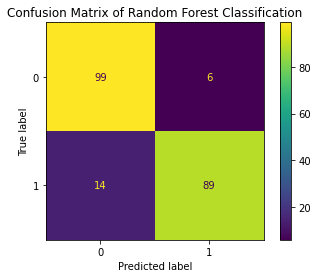

In [326]:
plot_confusion_matrix(rfc, X_test, y_test) 
plt.title("Confusion Matrix of Random Forest Classification")
plt.show()

There have been made 100(+-) positive predicted and true, 10(+-) positive predicted and false, 8(+-) negative predicted and false, 90(+-) negative predicted and true interpretation here we made with the Random Forest Classification model.

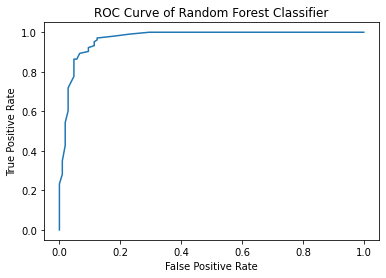

In [327]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.title("ROC Curve of Random Forest Classifier")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()